The best polynomial model is degree for Univariate file no. 1 is: 10
The best polynomial model is degree for Univariate file no. 2 is: 4
The best polynomial model is degree for Univariate file no. 3 is: 8
The best polynomial model is degree for Univariate file no. 4 is: 3

/root/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/root/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


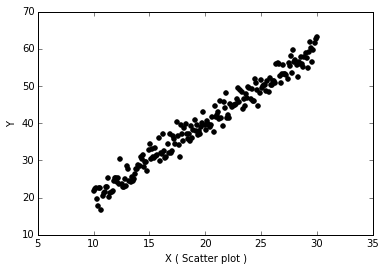

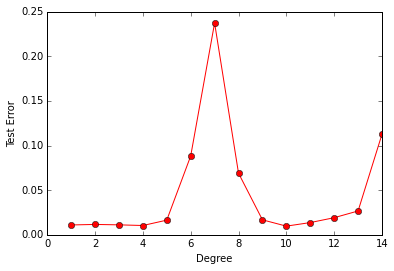

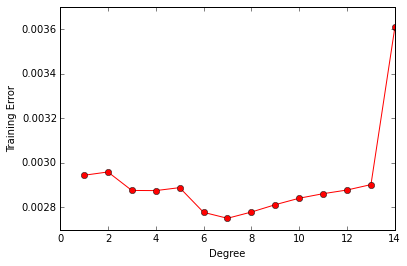

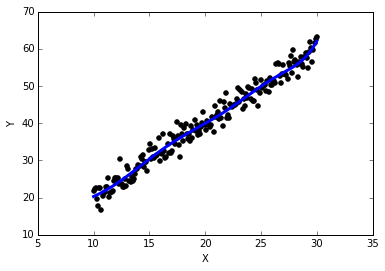

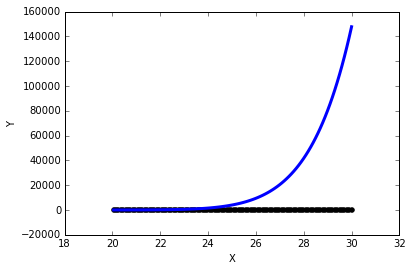

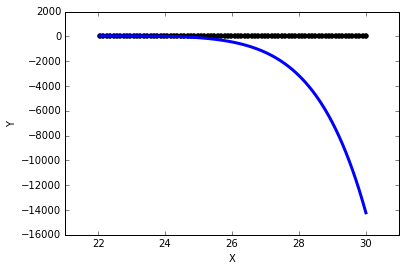

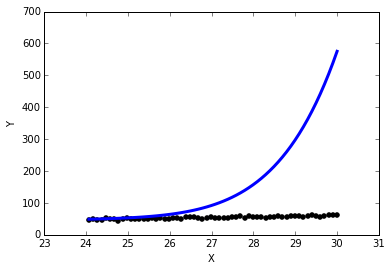

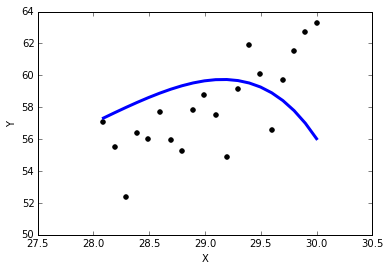

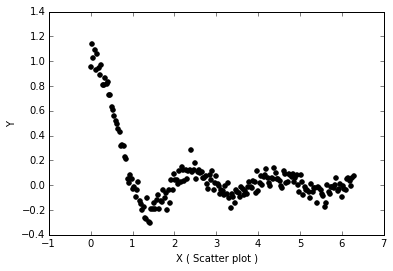

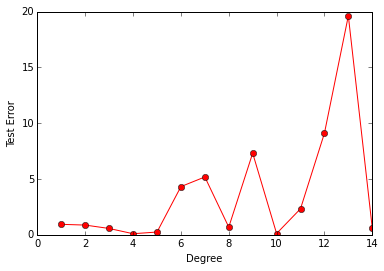

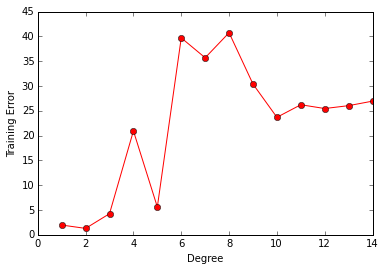

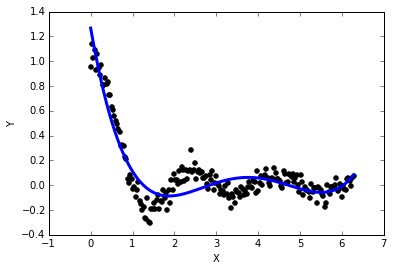

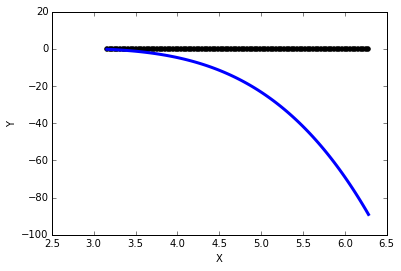

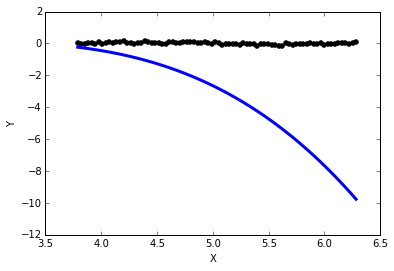

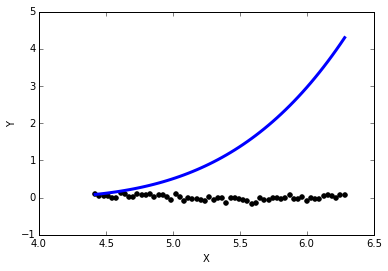

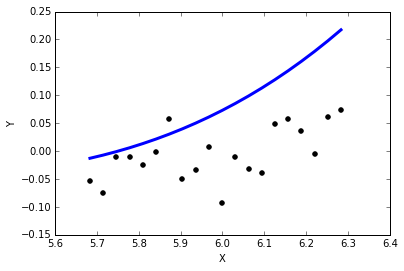

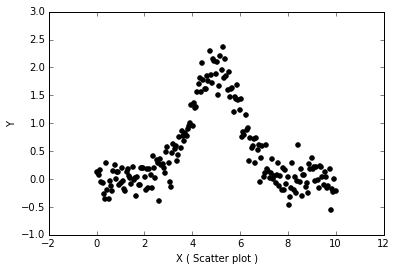

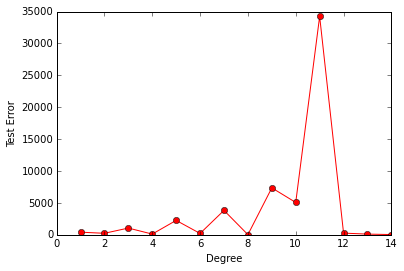

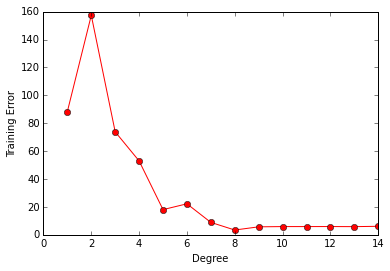

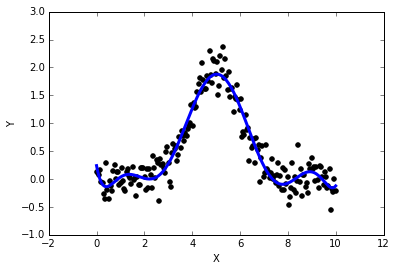

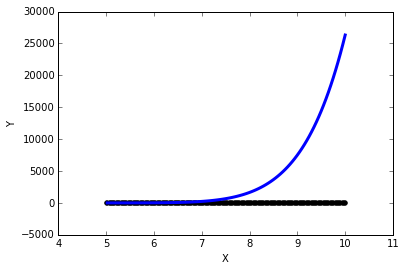

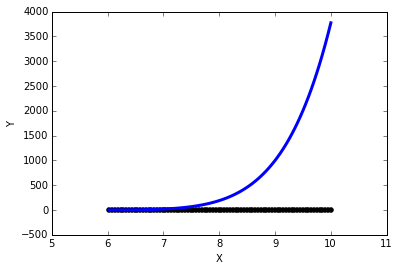

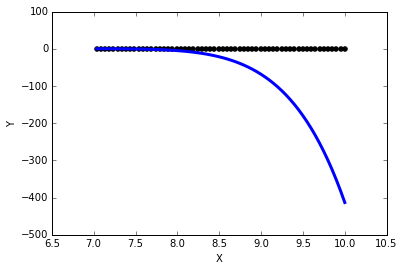

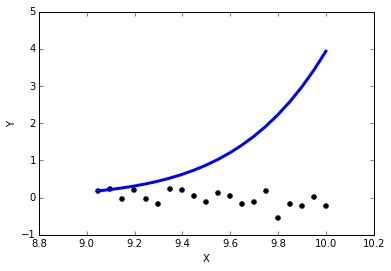

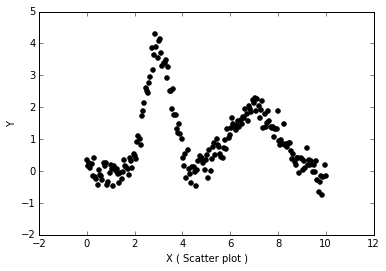

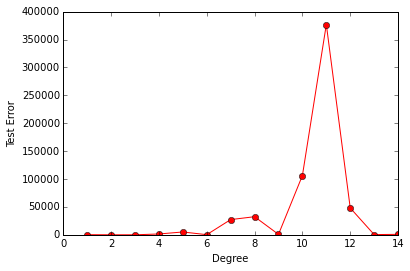

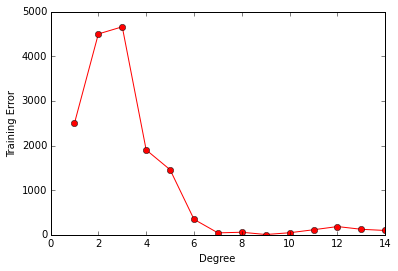

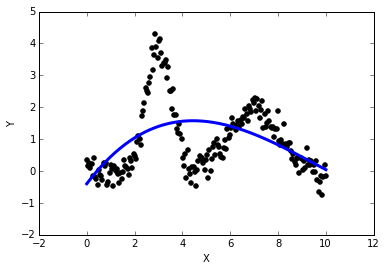

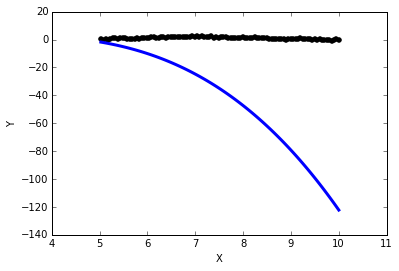

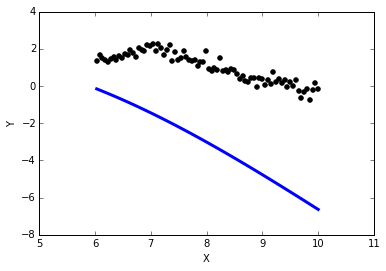

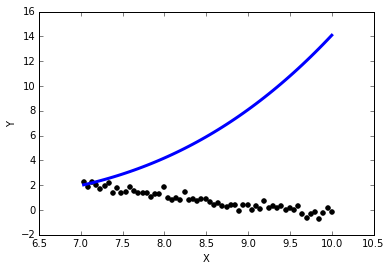

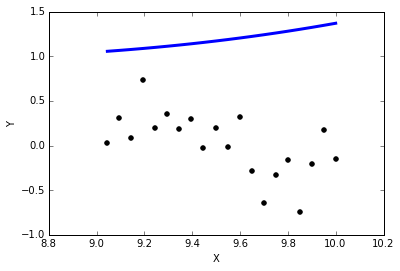

In [1]:
# Importing all the necessary packages.
import numpy as np
import urllib
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
from sklearn.cross_validation import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from numpy.linalg import inv,pinv
import time
%matplotlib inline

#Degrees.
#Links of all the files.
link = ['http://www.cs.iit.edu/~agam/cs584/data/regression/svar-set1.dat'
        ,'http://www.cs.iit.edu/~agam/cs584/data/regression/svar-set2.dat'
        ,'http://www.cs.iit.edu/~agam/cs584/data/regression/svar-set3.dat'
        ,'http://www.cs.iit.edu/~agam/cs584/data/regression/svar-set4.dat'
       ]
#Iterating through every Link in the uRL
for current in range(len(link)):
    f = urllib.urlopen(link[current])  
    predictor = []
    regressed_val = []
    myfile = f.readlines() 
    for i in range(len(myfile)):
        if i > 4:
            line = myfile[i].split("\n")
            value = line[0].lstrip().split(" ")
            predictor.append(float(value[0]))
            regressed_val.append(float(value[1]))
    pred_arr = np.asarray(predictor).reshape(len(predictor),1)
    regr_arr = np.asarray(regressed_val).reshape(len(regressed_val),1)
    plt.figure()
    plt.xlabel("X ( Scatter plot )")
    plt.ylabel("Y")
    #Plotting the scatter plot for checking the initial complexity.
    plt.scatter(pred_arr, regr_arr,  color='black')
    
    #Cross validation code for single variable regression. This contains the Single variable linear and polynomial regression
    def do_cross_validation_single_pn(X, y, n_folds=10,solved = "Python",poly = 0):
        indexes = np.argsort(X,axis = 0)
        X = np.sort(X,axis = 0)
        y = np.asarray([regressed_val[i] for i in indexes]).reshape(len(indexes),1)
        cv = KFold(len(y), n_folds)
        fold_no = 0
        kfold_accuracy = []
        train_error = []
        test_error = []
        for train_ind, test_ind in cv:
            #For solving the equations ( not used readymade Python function)
            if solved == "Non-Python":

                #Creating the Z matrix.
                Z_matrix_train = poly.fit_transform(X[train_ind])
                Z_matrix_test = poly.fit_transform(X[test_ind])
                Z_trn = Z_matrix_train.transpose()
                #Theta calculation.
                theta = np.dot(pinv(Z_matrix_train),y[train_ind])
                predictions_train = np.dot(Z_matrix_train,theta)
                predictions_test = np.dot(Z_matrix_test,theta)
                train_error.append(np.mean(((predictions_train - y[train_ind])/(y[train_ind])) ** 2))
                test_error.append(np.mean(((predictions_test - y[test_ind])/(y[test_ind])) ** 2))
                #plt1.scatter(X[test_ind], y[test_ind],  color='black')
                #plt1.plot(X[test_ind], predictions_test, color='red',linewidth=3)

            elif solved == "Python":
                regr = Pipeline([('poly', PolynomialFeatures(degree=poly)),
                                 ('linear', LinearRegression(fit_intercept=False))])
                regr.fit(X[train_ind],y[train_ind])
                predictions_train = regr.predict(X[train_ind])
                predictions_test = regr.predict(X[test_ind])
                train_error.append(np.mean(((predictions_train - y[train_ind])/(y[train_ind])) ** 2))
                test_error.append(np.mean(((predictions_test - y[test_ind])/(y[test_ind])) ** 2))
                #plt.scatter(X[test_ind], y[test_ind],  color='black')
                #plt.plot(X[test_ind], predictions_test, color='blue',linewidth=3)
            return(np.mean(train_error),np.mean(test_error))



    linear_model_err_me = []
    #linear_model_err_me.append(do_cross_validation_single_lm(pred_arr, regr_arr,solved = "Python"))
    linear_model_err_python = []

    for i in range(1,15):
        poly = PolynomialFeatures(i)
        #linear_model_err_python.append(do_cross_validation_single_pn(pred_arr, regr_arr,solved = "Non-Python",poly = poly))
        linear_model_err_python.append(do_cross_validation_single_pn(pred_arr, regr_arr,solved = "Python",poly = i))
    Y = [i[1] for i in linear_model_err_python]
    X = [i for i in range(1,15)]
    #Plotting the Degree vs the test error graph.
    plt.figure()
    plt.plot(X,Y,'-ro') 
    plt.xlabel("Degree")
    plt.ylabel("Test Error")
    Y1 = [i[0] for i in linear_model_err_python]
    plt.figure()
    plt.plot(X,Y1,'-ro') 
    #Plotting the Degree vs the training error graph.
    plt.xlabel("Degree")
    plt.ylabel("Training Error")
    Y = [abs(i) for i in Y]
    #finding out the best polynomial model which would be used for the model fitting.
    best_poly = Y.index(min(Y)) + 1
    print "The best polynomial model is degree for Univariate file no. %d is: %d"%(current+1,best_poly)
    
    #Function to plot the regression lines in the scatter plot.
    def regression_plot(X,y,poly = 3):
        indexes = np.argsort(X,axis = 0)
        X = np.sort(X,axis = 0)
        y = np.asarray([regressed_val[i] for i in indexes]).reshape(len(indexes),1)
        regr = Pipeline([('poly', PolynomialFeatures(degree=poly)),
                                 ('linear', LinearRegression(fit_intercept=False))])
        regr.fit(X,y)
        predictions_test = regr.predict(X)
        plt.figure()
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.scatter(X, y,  color='black')
        plt.plot(X, predictions_test, color='blue',linewidth=3)
    #Uncomment the below line if you want only a simple linear regression model
    #regression_plot(pred_arr, regr_arr,poly = 1)
    regression_plot(pred_arr, regr_arr,poly = best_poly)
    length_train = [0.5 , 0.6 , 0.7 , 0.90]
    
    #Function to reduce the training set to see the performance of the model.
    def reducing_training_set(X,y,size):
        indexes = np.argsort(X,axis = 0)
        X = np.sort(X,axis = 0)
        y = np.asarray([regressed_val[i] for i in indexes]).reshape(len(indexes),1)
        
        regr = Pipeline([('poly', PolynomialFeatures(degree=best_poly)),
                                 ('linear', LinearRegression(fit_intercept=False))])
        regr.fit(X[:size],y[:size])
        predictions_test = regr.predict(X[size:])
        
        plt.figure()
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.scatter(X[size:], y[size:],  color='black')
        plt.plot(X[size:], predictions_test, color='blue',linewidth=3)
    for i in range(len(length_train)): 
        size = int(len(pred_arr)) * length_train[i]
        reducing_training_set(pred_arr, regr_arr, int(size))
        
        

The best polynomial model is degree for Univariate file no. 4 is: 1


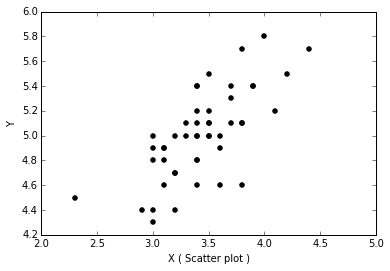

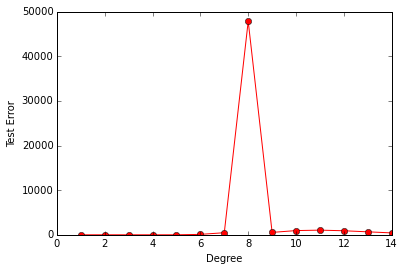

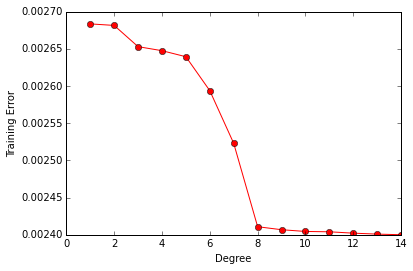

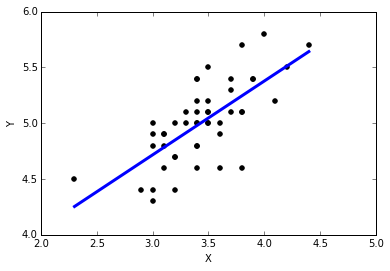

In [2]:
#For Synthetic dataset. I have downloaded the Iris Dataset in the file names 'iris.dat'
#Importing all the necessary packages.
import numpy as np
import urllib
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
from sklearn.cross_validation import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from numpy.linalg import inv,pinv
import time
%matplotlib inline

#Reading from the Iris.dat file
iris_data = open('iris.dat')
predictor = []
regressed_val = []
myfile= iris_data.readlines()
for i in range(len(myfile)):
        if i > 0:
            line = myfile[i].split("\n")
            value = line[0].split('\t')
            predictor.append((value[0]))
            regressed_val.append(value[1])

predictor = [float(i) for i in predictor]
regressed_val = [float(i) for i in regressed_val]
pred_arr = np.asarray(predictor).reshape(len(predictor),1)
regr_arr = np.asarray(regressed_val).reshape(len(regressed_val),1)
plt.figure()
plt.xlabel("X ( Scatter plot )")
plt.ylabel("Y")
plt.scatter(pred_arr, regr_arr,  color='black')

#Creating code for doing the cross validation 
def do_cross_validation_single_pn(X, y, n_folds=10,solved = "Python",poly = 0):
    indexes = np.argsort(X,axis = 0)
    X = np.sort(X,axis = 0)
    y = np.asarray([regressed_val[i] for i in indexes]).reshape(len(indexes),1)
    cv = KFold(len(y), n_folds)
    fold_no = 0
    kfold_accuracy = []
    train_error = []
    test_error = []
    for train_ind, test_ind in cv:
        if solved == "Non-Python":

            #Creating the Z matrix.
            Z_matrix_train = poly.fit_transform(X[train_ind])
            Z_matrix_test = poly.fit_transform(X[test_ind])
            Z_trn = Z_matrix_train.transpose()
            #theta calculation
            theta = np.dot(pinv(Z_matrix_train),y[train_ind])
            predictions_train = np.dot(Z_matrix_train,theta)
            #Predicting on the test set.
            predictions_test = np.dot(Z_matrix_test,theta)
            train_error.append(np.mean(((predictions_train - y[train_ind])/(y[train_ind])) ** 2))
            test_error.append(np.mean(((predictions_test - y[test_ind])/(y[test_ind])) ** 2))
                #plt1.scatter(X[test_ind], y[test_ind],  color='black')
                #plt1.plot(X[test_ind], predictions_test, color='red',linewidth=3)
        #readymade Python function for building the model.
        elif solved == "Python":
            regr = Pipeline([('poly', PolynomialFeatures(degree=poly)),
                                ('linear', LinearRegression(fit_intercept=False))])
            regr.fit(X[train_ind],y[train_ind])
            predictions_train = regr.predict(X[train_ind])
            predictions_test = regr.predict(X[test_ind])
            train_error.append(np.mean(((predictions_train - y[train_ind])/(y[train_ind])) ** 2))
            test_error.append(np.mean(((predictions_test - y[test_ind])/(y[test_ind])) ** 2))
                #plt.scatter(X[test_ind], y[test_ind],  color='black')
                #plt.plot(X[test_ind], predictions_test, color='blue',linewidth=3)
        return(np.mean(train_error),np.mean(test_error))



linear_model_err_me = []
    #linear_model_err_me.append(do_cross_validation_single_lm(pred_arr, regr_arr,solved = "Python"))
linear_model_err_python = []

for i in range(1,15):
    poly = PolynomialFeatures(i)
        #linear_model_err_python.append(do_cross_validation_single_pn(pred_arr, regr_arr,solved = "Non-Python",poly = poly))
    linear_model_err_python.append(do_cross_validation_single_pn(pred_arr, regr_arr,solved = "Python",poly = i))
Y = [i[1] for i in linear_model_err_python]
X = [i for i in range(1,15)]
plt.figure()
#Plotting the Degree vs the test error graph
plt.plot(X,Y,'-ro') 
plt.xlabel("Degree")
plt.ylabel("Test Error")
Y1 = [i[0] for i in linear_model_err_python]
plt.figure()
plt.plot(X,Y1,'-ro') 
#Plotting the Degree vs the Training error graph
plt.xlabel("Degree")
plt.ylabel("Training Error")
Y = [abs(i) for i in Y]
best_poly = Y.index(min(Y)) + 1
print "The best polynomial model is degree for Univariate file no. %d is: %d"%(current+1,best_poly)

#Plotting the regression plot over the scatter plot to see how our model does
def regression_plot(X,y,poly = 3):
    indexes = np.argsort(X,axis = 0)
    X = np.sort(X,axis = 0)
    y = np.asarray([regressed_val[i] for i in indexes]).reshape(len(indexes),1)
    regr = Pipeline([('poly', PolynomialFeatures(degree=poly)),
                                 ('linear', LinearRegression(fit_intercept=False))])
    regr.fit(X,y)
    predictions_test = regr.predict(X)
    plt.figure()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.scatter(X, y,  color='black')
    plt.plot(X, predictions_test, color='blue',linewidth=3)
regression_plot(pred_arr, regr_arr,poly = 1)



The best polynomial degree for Multivariate file no. 1 is: 2
The time taken for building the model for multivatiate file no. 1 is: 0 seconds
=====================Iterative solution =================
The final value of theta is:
[[ 0.57289694]
 [ 0.95806702]
 [ 0.95152409]
 [ 0.10889111]
 [ 0.00260485]
 [ 0.11474289]]
============XXXXXXXXXXXXX================
The best polynomial degree for Multivariate file no. 2 is: 3
The time taken for building the model for multivatiate file no. 2 is: 0 seconds
=====================Iterative solution =================
The final value of theta is:
[[ 0.11049661]
 [ 0.2510918 ]
 [ 0.17384403]
 [-0.0296877 ]
 [ 0.00982287]
 [-0.02940886]
 [-0.05795424]
 [-0.01823931]
 [-0.03231426]
 [-0.05131434]]
============XXXXXXXXXXXXX================


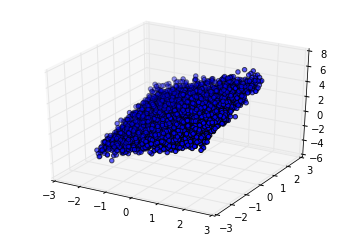

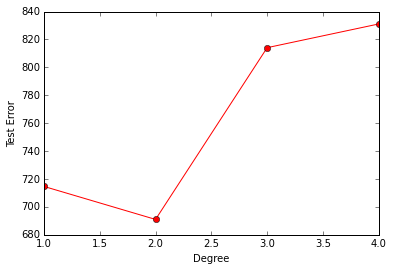

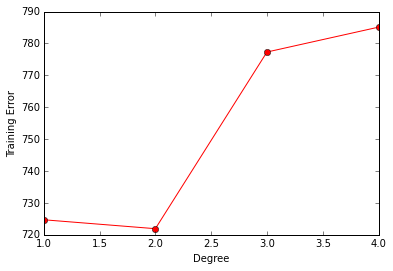

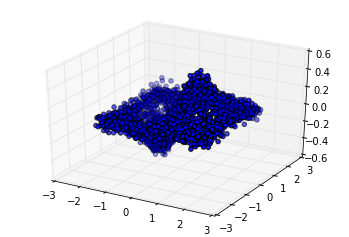

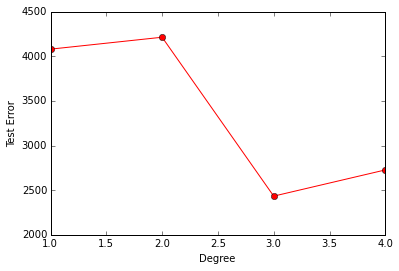

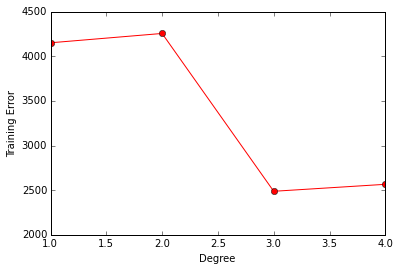

In [3]:
import numpy as np
import time
import urllib
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
from sklearn.cross_validation import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from numpy.linalg import inv,pinv
from math import exp
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# Included the first 2 multivariate files since the rest of the files were large in size.

link = ['http://www.cs.iit.edu/~agam/cs584/data/regression/mvar-set1.dat',
       
       'http://www.cs.iit.edu/~agam/cs584/data/regression/mvar-set2.dat'
        ]

for current in range(len(link)):
    f = urllib.urlopen(link[current])  
    predictor = []
    regressed_val = []
    myfile = f.readlines()
    pred_arr = []
    regr_arr = []
    for i in range(len(myfile)):
        if i > 4:
            line = myfile[i].split("\n")
            value = line[0].lstrip().split(" ")
            dep_vars = []
            ind_vars = []
            for i in xrange(len(value)):
                if i == len(value)-1:
                    ind_vars.append(float(value[i]))
                else:
                    dep_vars.append(float(value[i]))
            pred_arr.append(dep_vars)
            regr_arr.append(ind_vars)
    
    if current <=1 :
        
        pred_arr = np.asarray(pred_arr).reshape(len(pred_arr),2)
        regr_arr = np.asarray(regr_arr).reshape(len(regr_arr),1)
    #else:
        #pred_arr = np.asarray(pred_arr).reshape(len(pred_arr),5)
        #regr_arr = np.asarray(regr_arr).reshape(len(regr_arr),1)
        

    a= []
    b = []
    for i in range(len(pred_arr)):
                    a.append(pred_arr[i][0])
                    b.append(pred_arr[i][1])
    fig = plt.figure()
    #Plotting a 3-D scatter plot for analyzing the initial complexity
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(a,b,regr_arr)
    tm = time.time
    start = tm()
    #10 Cross Validation for multiple variable regression
    def do_cross_validation_multiple_ln(X, y, n_folds=10,solved = "Python",poly = 10):

        cv = KFold(len(y), n_folds)
        fold_no = 0
        kfold_accuracy = []
        train_error = []
        test_error = []
        for train_ind, test_ind in cv:

            if solved == "Non-Python":

                #Creating the Z matrix.
                Z_matrix_train = poly.fit_transform(X[train_ind])
                Z_matrix_test = poly.fit_transform(X[test_ind])
                Z_trn = Z_matrix_train.transpose()
                theta = np.dot(pinv(Z_matrix_train),y[train_ind])
                #print theta
                predictions_train = np.dot(Z_matrix_train,theta)
                #Predictions on the test set.
                predictions_test = np.dot(Z_matrix_test,theta)
                train_error.append(np.mean(((predictions_train - y[train_ind])/(y[train_ind])) ** 2))
                test_error.append(np.mean(((predictions_test - y[test_ind])/(y[test_ind])) ** 2))
                a = []
                b = []
                for i in range(len(pred_arr[test_ind])):
                    a.append(pred_arr[i][0])
                    b.append(pred_arr[i][1])

            elif solved == "Python":
                regr = Pipeline([('poly', PolynomialFeatures(degree=poly)),
                                 ('linear', LinearRegression(fit_intercept=False))])
                regr.fit(X[train_ind],y[train_ind])
                predictions_train = regr.predict(X[train_ind])
                predictions_test = regr.predict(X[test_ind])
                train_error.append(np.mean(((predictions_train - y[train_ind])/(y[train_ind])) ** 2))
                test_error.append(np.mean(((predictions_test - y[test_ind])/(y[test_ind])) ** 2))

                a = []
                b = []

                for i in range(len(pred_arr[test_ind])):
                    a.append(pred_arr[i][0])
                    b.append(pred_arr[i][1])

        return (np.mean(train_error),np.mean(test_error))
    linear_model_err_me = []
    linear_model_err_python = []
    
    for i in range(1,5):
        poly = PolynomialFeatures(i)
        linear_model_err_me.append(do_cross_validation_multiple_ln(pred_arr, regr_arr,solved = "Non-Python",poly = poly))
    end = tm()
    for i in range(1,5):
        linear_model_err_python.append(do_cross_validation_multiple_ln(pred_arr, regr_arr,solved = "Python",poly = i))
        
    
    Y = [i[1] for i in linear_model_err_python]
    X = [i for i in range(1,5)]
    plt.figure()
    plt.plot(X,Y,'-ro')
    #Plotting the Degree Vs the test error
    plt.xlabel("Degree")
    plt.ylabel("Test Error")
    Y1 = [i[0] for i in linear_model_err_python]
    plt.figure()
    plt.plot(X,Y1,'-ro')
    #Plotting the Degree Vs the training error
    plt.xlabel("Degree")
    plt.ylabel("Training Error")
    Y = [abs(i) for i in Y]
    best_poly = Y.index(min(Y)) + 1
    print "The best polynomial degree for Multivariate file no. %d is: %d"%(current+1,best_poly)
    print "The time taken for building the model for multivatiate file no. %d is: %d seconds"%(current+1,float(end-start))
    print "=====================Iterative solution ================="
    
    def iter_sol(X,y,threshold,learn_rt,best_poly): 
        #Setting the initial convergence condition as False
        converge = False
        poly = PolynomialFeatures(best_poly)
        #Creating the Z matrix with the best polynomial from the above method
        Z_matrix = poly.fit_transform(X)
        theta = np.zeros(shape=(Z_matrix.shape[1],1))
        #Initializing the initial value of theta as 0.4
        theta.fill(0.44)
        iterations = 0

        while converge ==False:
            theta0 = theta
            #Calculating the Gradient
            gradient = np.dot(Z_matrix.transpose(),(np.dot(Z_matrix,theta0) - y))
            #Updating the value of theta
            theta =  theta0 - (learn_rt*gradient)
            #Calculating the Gradient with theta0 and theta
            J_theta0 = np.dot(np.transpose(np.dot(Z_matrix,theta0) - y),(np.dot(Z_matrix,theta0)-y))
            J_theta = np.dot(np.transpose(np.dot(Z_matrix,theta) - y),(np.dot(Z_matrix,theta)-y))
            iterations += 1
            #Checking the threshold condition
            if abs((J_theta[0] - J_theta0[0])[0]) < threshold or iterations == 75:
                converge = True
                print "The final value of theta is:"
                print (theta)
                print "============XXXXXXXXXXXXX================"
    #After a few iterations I found that the value of learning rate should be 0.0001.   
    iter_sol(pred_arr,regr_arr, 0.01, 0.00001,best_poly)


In [ ]:
# Written the Gaussian Kernel Function at the end.  the copy of this code until the iterative method is copied from above just for 
# a backup.  The Kernel Function was taking a lot of time to load since it was a 2500 * 2500 Gram matrix.
# I have tested the Kernel function for a subset of the data and it was working fine.
import numpy as np
import time
import urllib
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
from sklearn.cross_validation import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from numpy.linalg import inv,pinv
from math import exp
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# Included the first 2 multivariate files since the rest of the files were large in size.

link = ['http://www.cs.iit.edu/~agam/cs584/data/regression/mvar-set1.dat',
       
       'http://www.cs.iit.edu/~agam/cs584/data/regression/mvar-set2.dat'
        ]

for current in range(len(link)):
    f = urllib.urlopen(link[current])  
    predictor = []
    regressed_val = []
    myfile = f.readlines()
    pred_arr = []
    regr_arr = []
    for i in range(len(myfile)):
        if i > 4:
            line = myfile[i].split("\n")
            value = line[0].lstrip().split(" ")
            dep_vars = []
            ind_vars = []
            for i in xrange(len(value)):
                if i == len(value)-1:
                    ind_vars.append(float(value[i]))
                else:
                    dep_vars.append(float(value[i]))
            pred_arr.append(dep_vars)
            regr_arr.append(ind_vars)
    
    if current <=1 :
        
        pred_arr = np.asarray(pred_arr).reshape(len(pred_arr),2)
        regr_arr = np.asarray(regr_arr).reshape(len(regr_arr),1)
    #else:
        #pred_arr = np.asarray(pred_arr).reshape(len(pred_arr),5)
        #regr_arr = np.asarray(regr_arr).reshape(len(regr_arr),1)
        

    a= []
    b = []
    for i in range(len(pred_arr)):
                    a.append(pred_arr[i][0])
                    b.append(pred_arr[i][1])
    fig = plt.figure()
    #Plotting a 3-D scatter plot for analyzing the initial complexity
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(a,b,regr_arr)
    tm = time.time
    start = tm()
    #10 Cross Validation for multiple variable regression
    def do_cross_validation_multiple_ln(X, y, n_folds=10,solved = "Python",poly = 10):

        cv = KFold(len(y), n_folds)
        fold_no = 0
        kfold_accuracy = []
        train_error = []
        test_error = []
        for train_ind, test_ind in cv:

            if solved == "Non-Python":

                #Creating the Z matrix.
                Z_matrix_train = poly.fit_transform(X[train_ind])
                Z_matrix_test = poly.fit_transform(X[test_ind])
                Z_trn = Z_matrix_train.transpose()
                theta = np.dot(pinv(Z_matrix_train),y[train_ind])
                #print theta
                predictions_train = np.dot(Z_matrix_train,theta)
                #Predictions on the test set.
                predictions_test = np.dot(Z_matrix_test,theta)
                train_error.append(np.mean(((predictions_train - y[train_ind])/(y[train_ind])) ** 2))
                test_error.append(np.mean(((predictions_test - y[test_ind])/(y[test_ind])) ** 2))
                a = []
                b = []
                for i in range(len(pred_arr[test_ind])):
                    a.append(pred_arr[i][0])
                    b.append(pred_arr[i][1])

            elif solved == "Python":
                regr = Pipeline([('poly', PolynomialFeatures(degree=poly)),
                                 ('linear', LinearRegression(fit_intercept=False))])
                regr.fit(X[train_ind],y[train_ind])
                predictions_train = regr.predict(X[train_ind])
                predictions_test = regr.predict(X[test_ind])
                train_error.append(np.mean(((predictions_train - y[train_ind])/(y[train_ind])) ** 2))
                test_error.append(np.mean(((predictions_test - y[test_ind])/(y[test_ind])) ** 2))

                a = []
                b = []

                for i in range(len(pred_arr[test_ind])):
                    a.append(pred_arr[i][0])
                    b.append(pred_arr[i][1])

        return (np.mean(train_error),np.mean(test_error))
    linear_model_err_me = []
    linear_model_err_python = []
    
    for i in range(1,5):
        poly = PolynomialFeatures(i)
        linear_model_err_me.append(do_cross_validation_multiple_ln(pred_arr, regr_arr,solved = "Non-Python",poly = poly))
    end = tm()
    for i in range(1,5):
        linear_model_err_python.append(do_cross_validation_multiple_ln(pred_arr, regr_arr,solved = "Python",poly = i))
        
    
    Y = [i[1] for i in linear_model_err_python]
    X = [i for i in range(1,5)]
    plt.figure()
    plt.plot(X,Y,'-ro')
    #Plotting the Degree Vs the test error
    plt.xlabel("Degree")
    plt.ylabel("Test Error")
    Y1 = [i[0] for i in linear_model_err_python]
    plt.figure()
    plt.plot(X,Y1,'-ro')
    #Plotting the Degree Vs the training error
    plt.xlabel("Degree")
    plt.ylabel("Training Error")
    Y = [abs(i) for i in Y]
    best_poly = Y.index(min(Y)) + 1
    print "The best polynomial degree for Multivariate file no. %d is: %d"%(current+1,best_poly)
    print "The time taken for building the model for multivatiate file no. %d is: %d seconds"%(current+1,float(end-start))
    print "=====================Iterative solution ================="
    
    def iter_sol(X,y,threshold,learn_rt,best_poly):    
        converge = False
        poly = PolynomialFeatures(best_poly)
        Z_matrix = poly.fit_transform(X)
        theta = np.zeros(shape=(Z_matrix.shape[1],1))
        theta.fill(0.7)
        iterations = 0

        while converge ==False:
            theta0 = theta
            gradient = np.dot(Z_matrix.transpose(),(np.dot(Z_matrix,theta0) - y))
            
            theta =  theta0 - (learn_rt*gradient)
            J_theta0 = np.dot(np.transpose(np.dot(Z_matrix,theta0) - y),(np.dot(Z_matrix,theta0)-y))
            J_theta = np.dot(np.transpose(np.dot(Z_matrix,theta) - y),(np.dot(Z_matrix,theta)-y))
            iterations += 1

            if abs((J_theta[0] - J_theta0[0])[0]) < threshold or iterations == 75:
                converge = True
                print "The final value of theta is:"
                print (theta)
                print "============XXXXXXXXXXXXX================"
        
    iter_sol(pred_arr,regr_arr, 0.01, 0.00001,best_poly)

    # Implementing Gaussian Kernel Function to computer the similarity of the vectors.
    def kernel_func(X,y,std):
        
        trn = np.transpose(X-y)
        m = np.dot(trn,(X-y))          
        return (exp(m*(-1/(2*(std**2))))) #Gaussian Kernel Function
                
    #kernel_func(pred_arr[0],pred_arr[0],2)
    
    gram_matrix = np.zeros(shape=(len(pred_arr),len(pred_arr)))
    for i in range(len(pred_arr)):
        comp = pred_arr[i]
        for j in range(len(pred_arr)):        
            comp1 = pred_arr[j]
            gram_matrix[i][j] = gram_matrix[i][j] + kernel_func(comp,comp1,2)
    
    #Calculating the value of aplha using the Gram matrix constructed above.       
    alpha_val = np.dot(inv(gram_matrix),regr_arr)
    
    #Using the alpha_value predicting the values of 'y'
    
    
    z_matrix = np.zeros(shape=(len(pred_arr,1)))
    for i in range(len(pred_arr)):
    z_matrix[i][0] += kernel_func(pred_arr[i],pred_arr[0],2)
    
    #Predicting the value of 'y' with the alpha_val
    predictions = np.dot(np.transpose(alpha_val),z_matrix)

    print predictions